In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("Database.csv")

Dimensionality Reduction

In [3]:
df = df.drop(["Unnamed: 0",'DHI', 'DNI', 'GHI', 'PV_production','Wind_production'],axis = 1)

In [4]:
df.columns

Index(['Time', 'Season', 'Day_of_the_week', 'Wind_speed', 'Humidity',
       'Temperature', 'Electric_demand'],
      dtype='object')

Dataset Information

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 315648 entries, 0 to 315647
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Time             315648 non-null  object 
 1   Season           315648 non-null  int64  
 2   Day_of_the_week  315648 non-null  int64  
 3   Wind_speed       315648 non-null  float64
 4   Humidity         315648 non-null  float64
 5   Temperature      315648 non-null  float64
 6   Electric_demand  315648 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 16.9+ MB


In [6]:
df['Time'] = pd.to_datetime(df['Time'], format='%Y-%m-%d-T%H:%M')

In [7]:
copy = df.copy()

In [8]:
# Set 'Time' as the index of the DataFrame
copy.set_index('Time', inplace=True)

# Resample the data to an hourly basis, taking the mean of each hour
df_hourly = copy.resample('H').mean()

# Reset the index
df_hourly.reset_index(inplace=True)


C:\Users\mayan\AppData\Local\Temp\ipykernel_2776\4134368163.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_hourly = copy.resample('H').mean()


In [9]:
df

,Time,Season,Day_of_the_week,Wind_speed,Humidity,Temperature,Electric_demand
0,2019-01-01 00:00:00,1,1,2.88,56.036,1.82,22216
1,2019-01-01 00:05:00,1,1,2.88,56.036,1.82,22106
2,2019-01-01 00:10:00,1,1,2.88,56.194,1.78,22130
3,2019-01-01 00:15:00,1,1,2.88,56.344,1.74,22040
4,2019-01-01 00:20:00,1,1,2.84,56.440,1.72,21963
...,...,...,...,...,...,...,...
315643,2021-12-31 23:35:00,4,4,1.64,64.898,5.68,22939
315644,2021-12-31 23:40:00,4,4,1.64,64.970,5.66,22855
315645,2021-12-31 23:45:00,4,4,1.64,65.042,5.64,22812
315646,2021-12-31 23:50:00,4,4,1.64,65.234,5.60,22723


In [10]:
df_hourly

,Time,Season,Day_of_the_week,Wind_speed,Humidity,Temperature,Electric_demand
0,2019-01-01 00:00:00,1.0,1.0,2.838333,55.809333,1.683333,21851.416667
1,2019-01-01 01:00:00,1.0,1.0,2.770000,55.159000,1.405000,21099.666667
2,2019-01-01 02:00:00,1.0,1.0,2.690000,54.532833,1.186667,20495.416667
3,2019-01-01 03:00:00,1.0,1.0,2.655000,54.317833,0.985000,20147.500000
4,2019-01-01 04:00:00,1.0,1.0,2.628333,54.296667,0.811667,20144.416667
...,...,...,...,...,...,...,...
26299,2021-12-31 19:00:00,4.0,4.0,1.718333,64.786667,7.090000,26447.333333
26300,2021-12-31 20:00:00,4.0,4.0,1.658333,65.098167,6.751667,25743.083333
26301,2021-12-31 21:00:00,4.0,4.0,1.661667,65.315667,6.405000,25009.250000
26302,2021-12-31 22:00:00,4.0,4.0,1.675000,65.576167,6.045000,24060.250000


In [11]:
df_hourly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26304 entries, 0 to 26303
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Time             26304 non-null  datetime64[ns]
 1   Season           26304 non-null  float64       
 2   Day_of_the_week  26304 non-null  float64       
 3   Wind_speed       26304 non-null  float64       
 4   Humidity         26304 non-null  float64       
 5   Temperature      26304 non-null  float64       
 6   Electric_demand  26304 non-null  float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 1.4 MB


In [12]:
df_hourly.describe()

,Time,Season,Day_of_the_week,Wind_speed,Humidity,Temperature,Electric_demand
count,26304,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000
mean,2020-07-01 23:30:00,2.508212,2.998175,2.545759,51.261462,17.472179,24833.695287
min,2019-01-01 00:00:00,1.000000,0.000000,0.691667,11.664667,-0.471667,14729.250000
25%,2019-10-01 23:45:00,2.000000,1.000000,1.761667,38.394917,11.220000,21373.333333
50%,2020-07-01 23:30:00,3.000000,3.000000,2.348333,51.697167,16.677500,23874.000000
75%,2021-04-01 23:15:00,4.000000,5.000000,3.151667,63.586000,22.822083,26798.166667
max,2021-12-31 23:00:00,4.000000,6.000000,8.465000,88.334833,38.920000,46932.750000
std,NaN,1.117209,1.997755,1.040420,16.288058,7.694648,4848.313453


In [13]:
df_hourly.columns

Index(['Time', 'Season', 'Day_of_the_week', 'Wind_speed', 'Humidity',
       'Temperature', 'Electric_demand'],
      dtype='object')

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
features = ['Time', 'Season', 'Day_of_the_week', 'Wind_speed', 'Humidity', 'Temperature', 'Electric_demand']
colors = ["skyblue","salmon","green","purple", "orange","red","yellow"]


def plot_histplot(df,colors,features):
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 8))
    fig.suptitle("Distribution Plots for Features")

    # Flatten the axes array
    axes = axes.flatten()
    
    # Plot histograms and density plots
    for i, feature in enumerate(features ): 
        color = colors[i % len(colors)]  # Cycle through colors
        sns.histplot(df[feature], kde=True, ax=axes[i], color=color)
        axes[i].set_title(f"{feature} Distribution")

    # Remove unused subplots
    if len(features) < len(axes):
        for j in range(len(features), len(axes)):
            fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

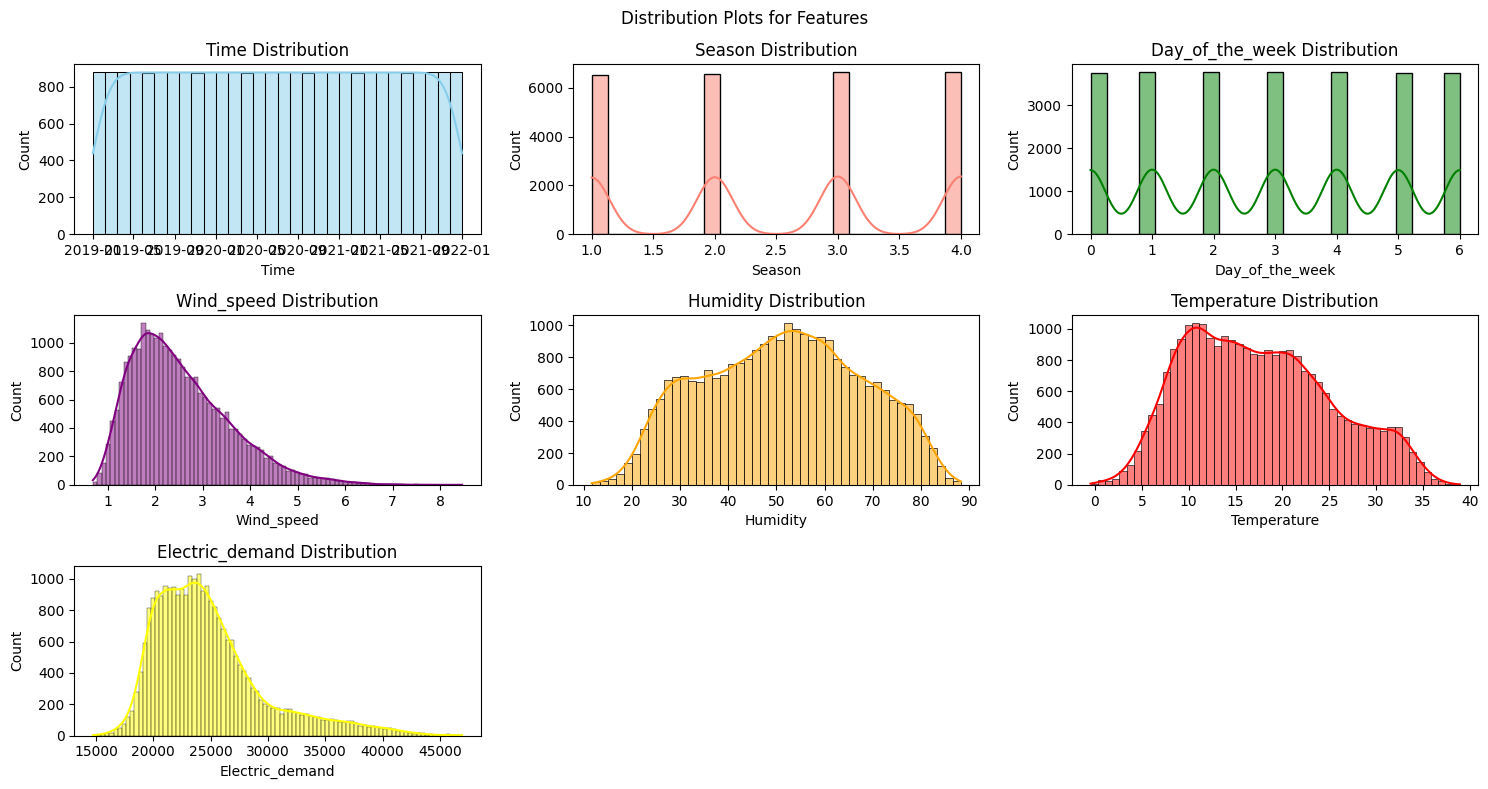

In [16]:
plot_histplot(df_hourly,colors,features)

In [17]:
for feature in features:
    print(feature, ": ", (df_hourly[feature]==0).sum())

Time :  0
Season :  0
Day_of_the_week :  3744
Wind_speed :  0
Humidity :  0
Temperature :  0
Electric_demand :  0


Text(0.5, 1.0, 'Correlation Heatmap')

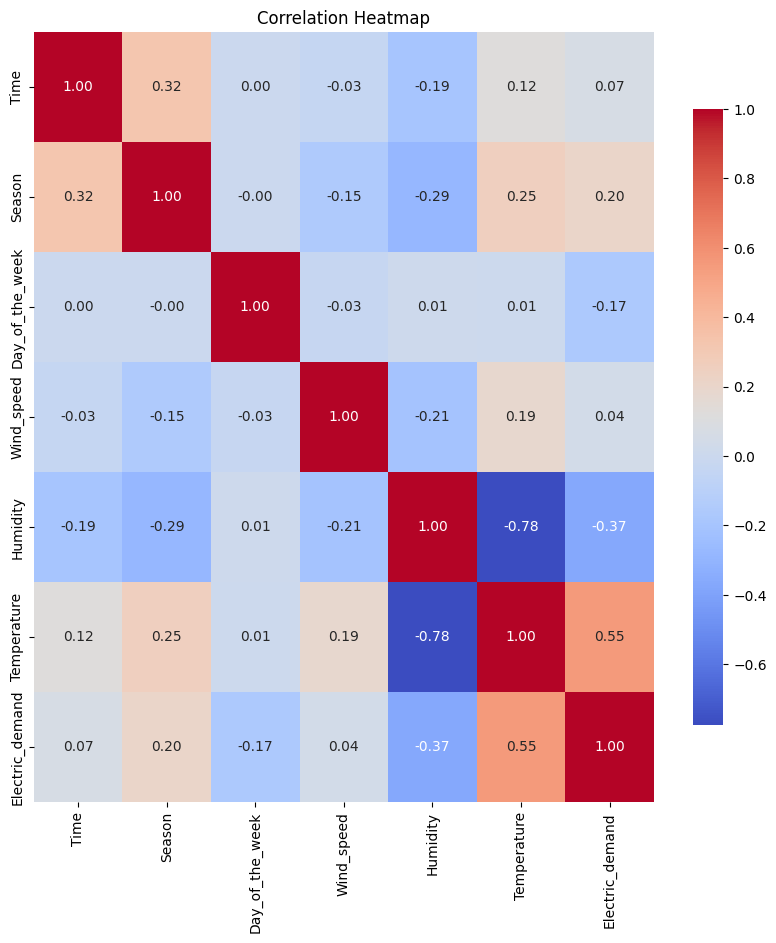

In [18]:
corr = df_hourly[features].corr()
fig, ax = plt.subplots(figsize=(10, 10))

sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f",ax = ax,cbar_kws={"shrink":.8})
ax.set_title("Correlation Heatmap")

In [19]:
df_hourly


,Time,Season,Day_of_the_week,Wind_speed,Humidity,Temperature,Electric_demand
0,2019-01-01 00:00:00,1.0,1.0,2.838333,55.809333,1.683333,21851.416667
1,2019-01-01 01:00:00,1.0,1.0,2.770000,55.159000,1.405000,21099.666667
2,2019-01-01 02:00:00,1.0,1.0,2.690000,54.532833,1.186667,20495.416667
3,2019-01-01 03:00:00,1.0,1.0,2.655000,54.317833,0.985000,20147.500000
4,2019-01-01 04:00:00,1.0,1.0,2.628333,54.296667,0.811667,20144.416667
...,...,...,...,...,...,...,...
26299,2021-12-31 19:00:00,4.0,4.0,1.718333,64.786667,7.090000,26447.333333
26300,2021-12-31 20:00:00,4.0,4.0,1.658333,65.098167,6.751667,25743.083333
26301,2021-12-31 21:00:00,4.0,4.0,1.661667,65.315667,6.405000,25009.250000
26302,2021-12-31 22:00:00,4.0,4.0,1.675000,65.576167,6.045000,24060.250000


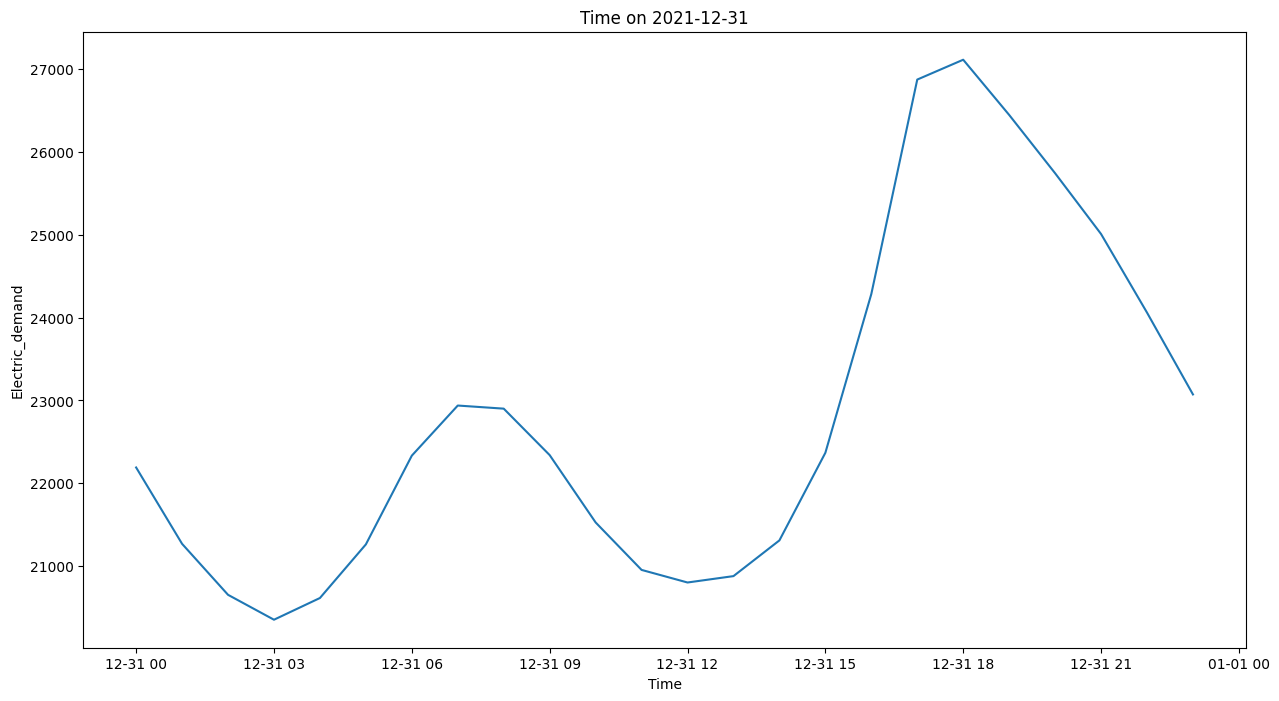

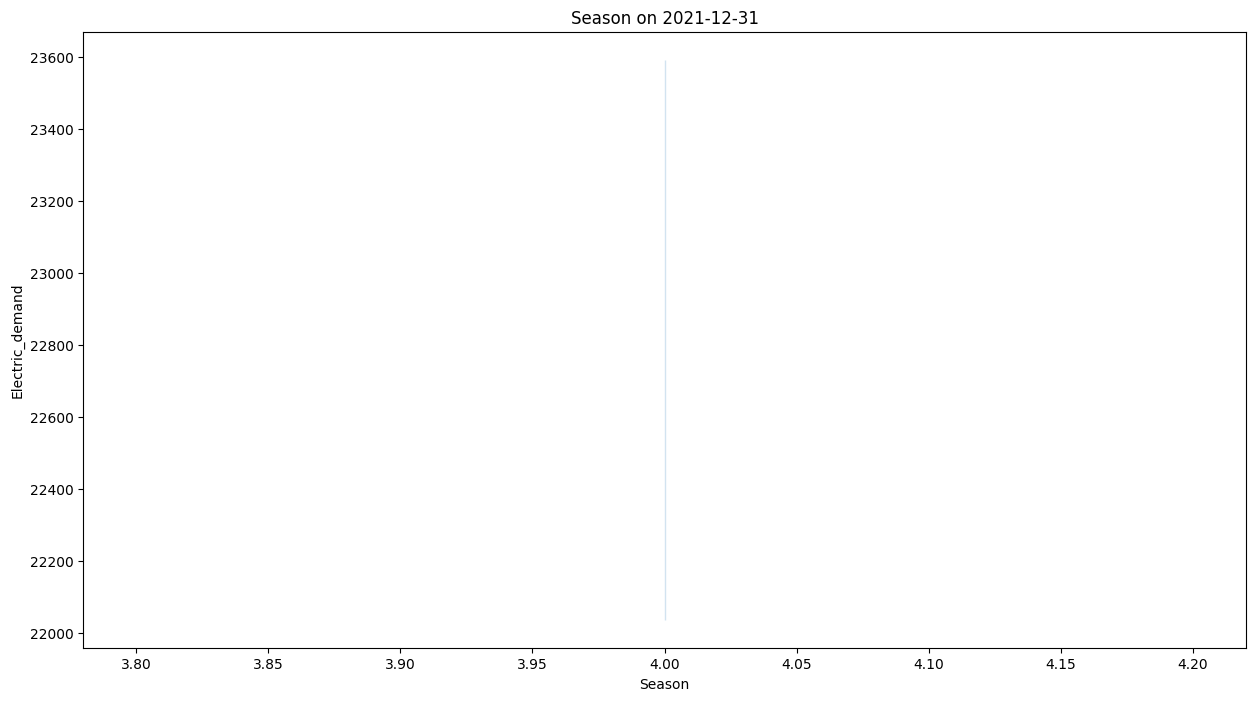

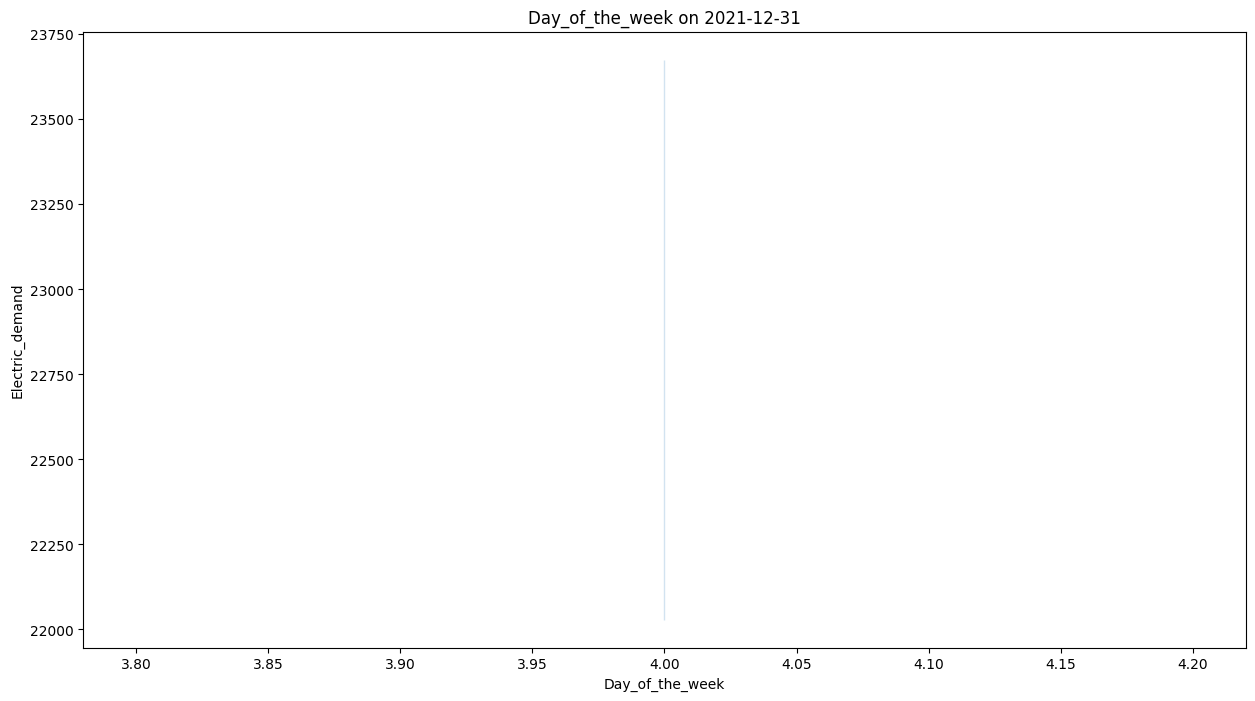

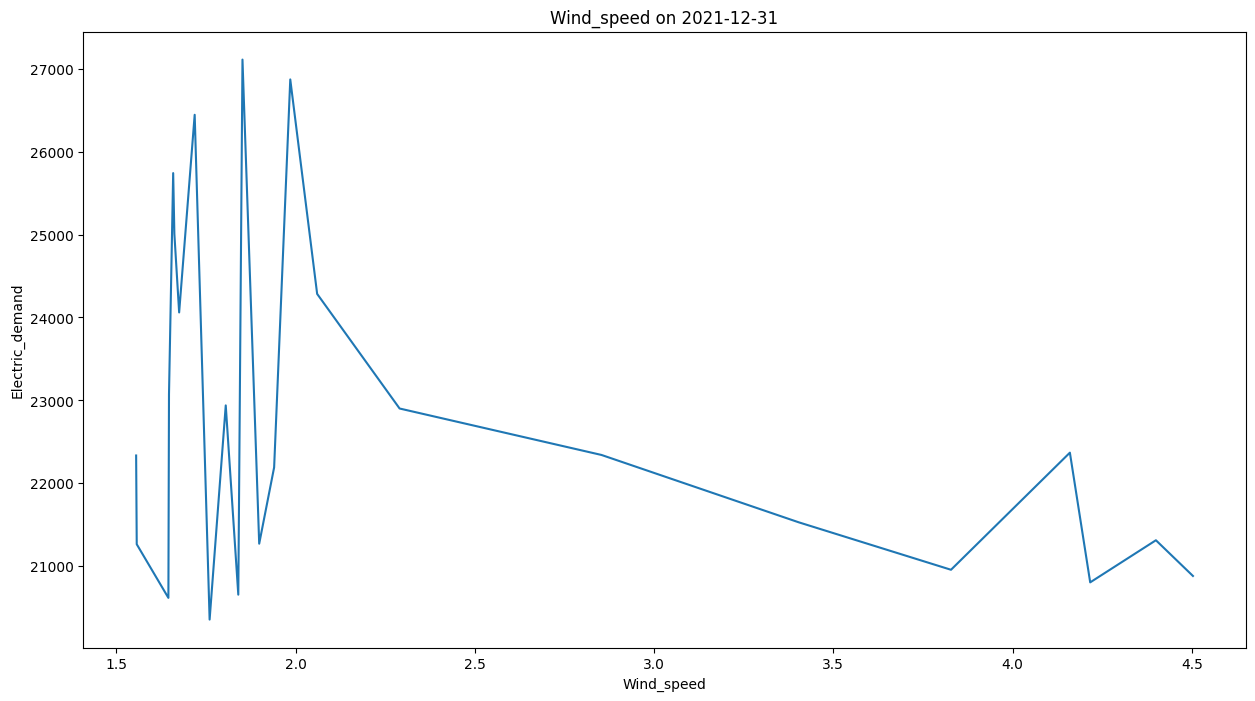

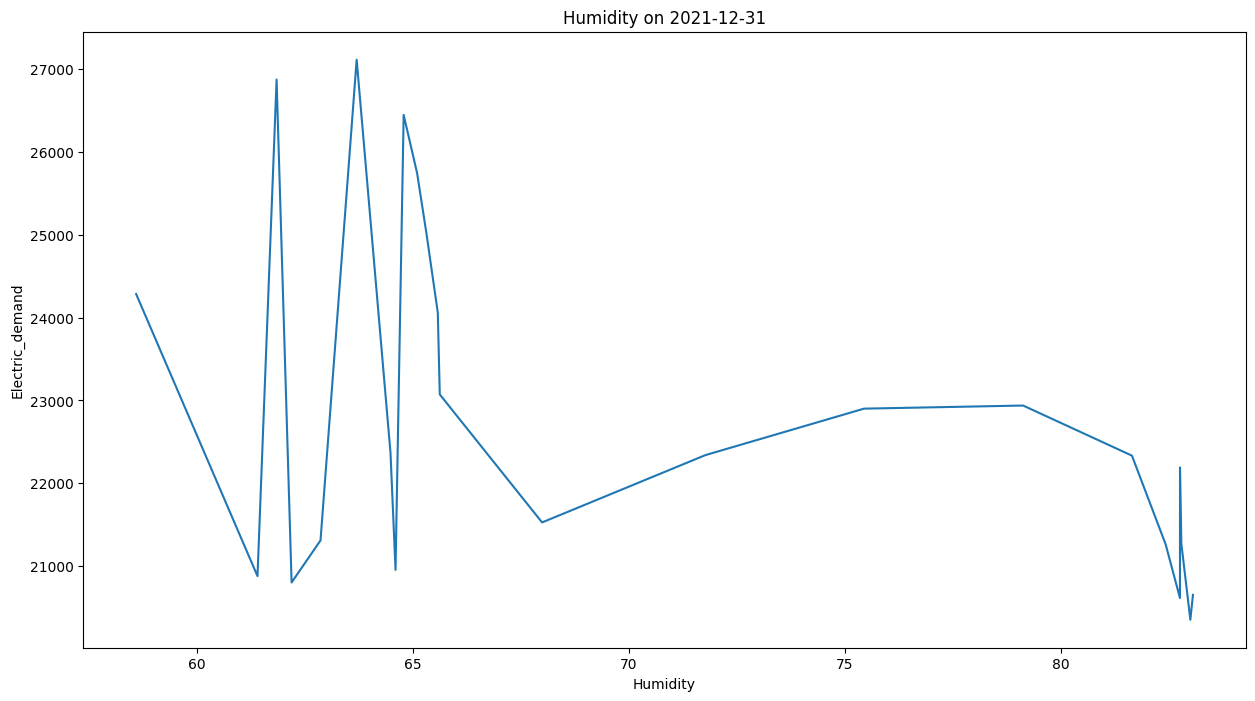

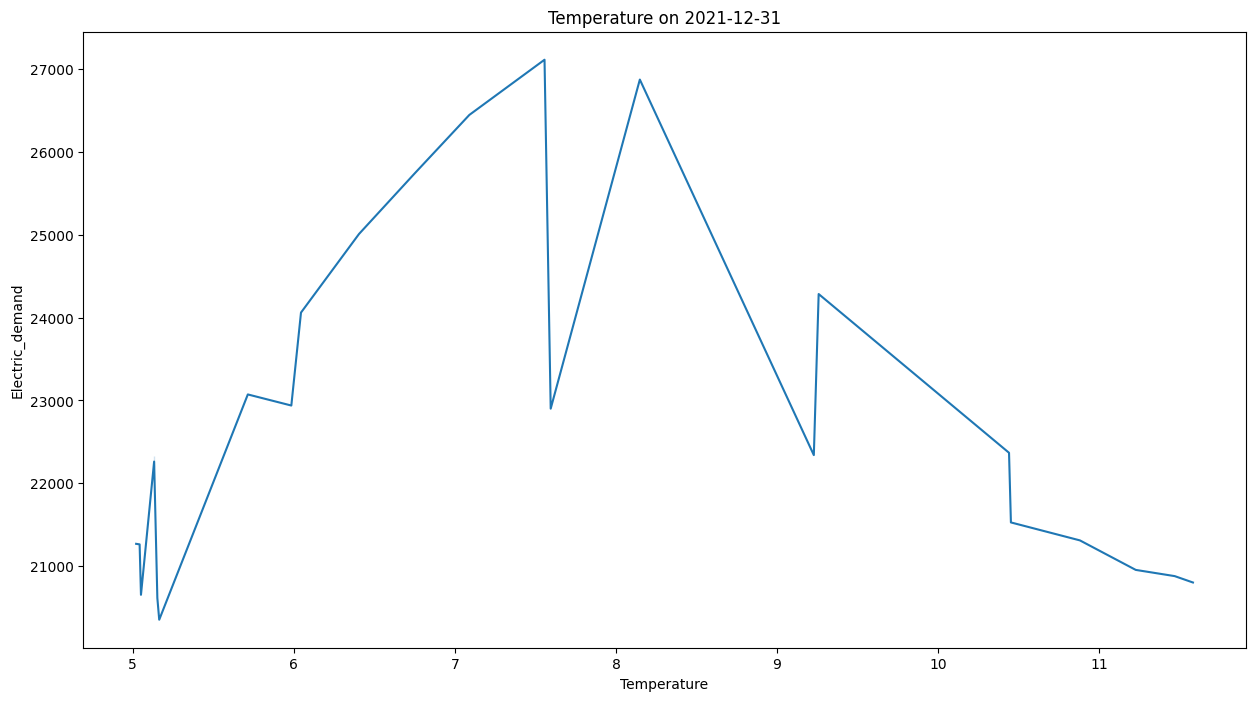

In [20]:
day_to_plot = '2021-12-31'
df_day = df_hourly[df_hourly['Time'].dt.strftime('%Y-%m-%d') == day_to_plot]

features = ['Time', 'Season', 'Day_of_the_week', 'Wind_speed', 'Humidity', 'Temperature']
colors = ["skyblue","salmon","green","purple", "orange","red"]


for feature in features:
    plt.figure(figsize=(15, 8))
    sns.lineplot(x=feature, y="Electric_demand", data=df_day)
    plt.title(f'{feature} on {day_to_plot}')
    plt.show()



In [21]:
df_hourly

,Time,Season,Day_of_the_week,Wind_speed,Humidity,Temperature,Electric_demand
0,2019-01-01 00:00:00,1.0,1.0,2.838333,55.809333,1.683333,21851.416667
1,2019-01-01 01:00:00,1.0,1.0,2.770000,55.159000,1.405000,21099.666667
2,2019-01-01 02:00:00,1.0,1.0,2.690000,54.532833,1.186667,20495.416667
3,2019-01-01 03:00:00,1.0,1.0,2.655000,54.317833,0.985000,20147.500000
4,2019-01-01 04:00:00,1.0,1.0,2.628333,54.296667,0.811667,20144.416667
...,...,...,...,...,...,...,...
26299,2021-12-31 19:00:00,4.0,4.0,1.718333,64.786667,7.090000,26447.333333
26300,2021-12-31 20:00:00,4.0,4.0,1.658333,65.098167,6.751667,25743.083333
26301,2021-12-31 21:00:00,4.0,4.0,1.661667,65.315667,6.405000,25009.250000
26302,2021-12-31 22:00:00,4.0,4.0,1.675000,65.576167,6.045000,24060.250000


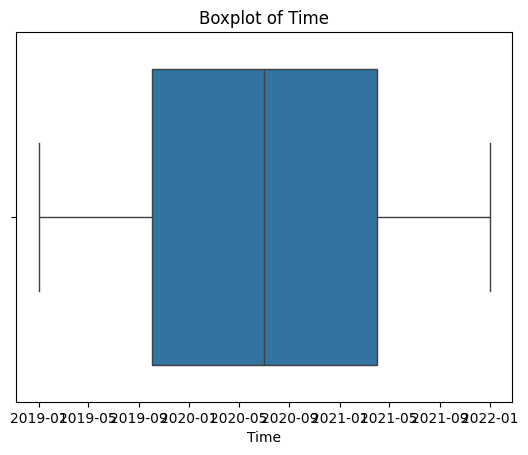

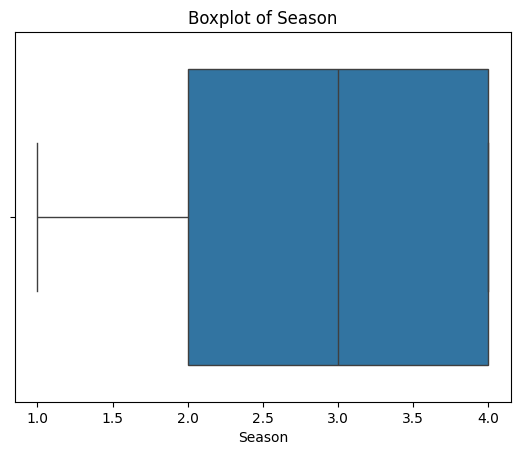

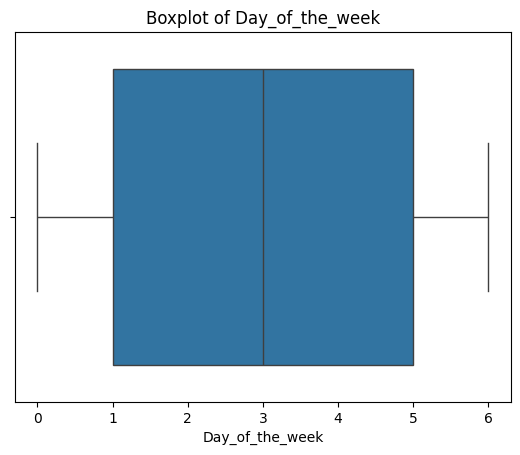

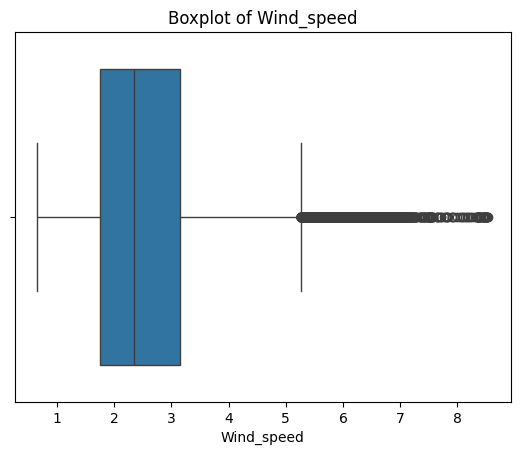

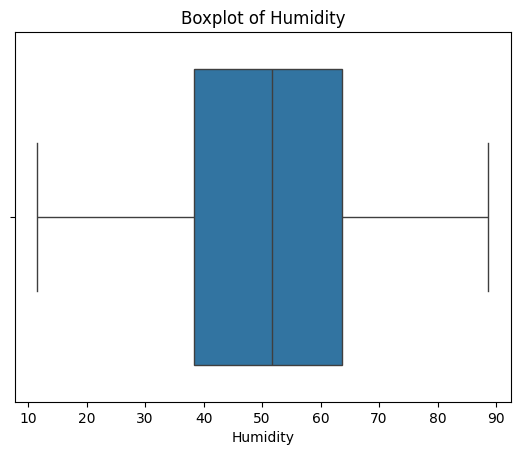

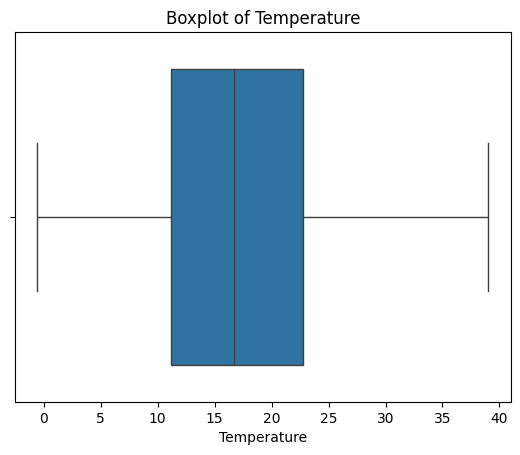

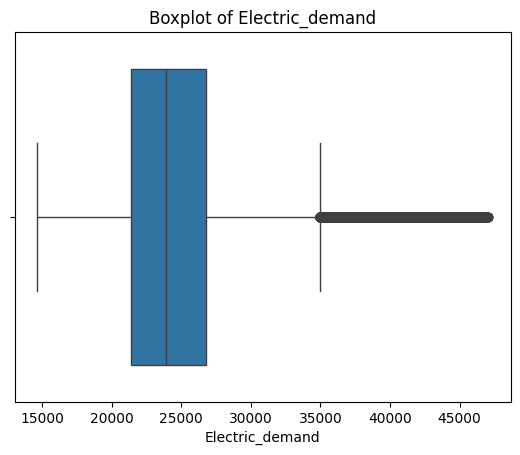

In [22]:
features = ['Time', 'Season', 'Day_of_the_week', 'Wind_speed', 'Humidity', 'Temperature', 'Electric_demand']

for feature in features:
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot of {feature}')
    plt.show()

In [23]:
df_hourly

,Time,Season,Day_of_the_week,Wind_speed,Humidity,Temperature,Electric_demand
0,2019-01-01 00:00:00,1.0,1.0,2.838333,55.809333,1.683333,21851.416667
1,2019-01-01 01:00:00,1.0,1.0,2.770000,55.159000,1.405000,21099.666667
2,2019-01-01 02:00:00,1.0,1.0,2.690000,54.532833,1.186667,20495.416667
3,2019-01-01 03:00:00,1.0,1.0,2.655000,54.317833,0.985000,20147.500000
4,2019-01-01 04:00:00,1.0,1.0,2.628333,54.296667,0.811667,20144.416667
...,...,...,...,...,...,...,...
26299,2021-12-31 19:00:00,4.0,4.0,1.718333,64.786667,7.090000,26447.333333
26300,2021-12-31 20:00:00,4.0,4.0,1.658333,65.098167,6.751667,25743.083333
26301,2021-12-31 21:00:00,4.0,4.0,1.661667,65.315667,6.405000,25009.250000
26302,2021-12-31 22:00:00,4.0,4.0,1.675000,65.576167,6.045000,24060.250000


# ***Fuzzy Logic System***

In [24]:
df_hourly['time_of_day'] = pd.cut(df_hourly['Time'].dt.hour, 
                                   bins=[0, 6, 12, 18, 24], 
                                   labels=['Night', 'Morning', 'Afternoon', 'Evening'],
                                   include_lowest=True)

In [25]:
df_hourly

,Time,Season,Day_of_the_week,Wind_speed,Humidity,Temperature,Electric_demand,time_of_day
0,2019-01-01 00:00:00,1.0,1.0,2.838333,55.809333,1.683333,21851.416667,Night
1,2019-01-01 01:00:00,1.0,1.0,2.770000,55.159000,1.405000,21099.666667,Night
2,2019-01-01 02:00:00,1.0,1.0,2.690000,54.532833,1.186667,20495.416667,Night
3,2019-01-01 03:00:00,1.0,1.0,2.655000,54.317833,0.985000,20147.500000,Night
4,2019-01-01 04:00:00,1.0,1.0,2.628333,54.296667,0.811667,20144.416667,Night
...,...,...,...,...,...,...,...,...
26299,2021-12-31 19:00:00,4.0,4.0,1.718333,64.786667,7.090000,26447.333333,Evening
26300,2021-12-31 20:00:00,4.0,4.0,1.658333,65.098167,6.751667,25743.083333,Evening
26301,2021-12-31 21:00:00,4.0,4.0,1.661667,65.315667,6.405000,25009.250000,Evening
26302,2021-12-31 22:00:00,4.0,4.0,1.675000,65.576167,6.045000,24060.250000,Evening


In [26]:
import skfuzzy as fuzz
from skfuzzy import control as ctrl

Defining Universe

In [27]:
# Convert 'season' and 'day_of_the_week' to integer
df_hourly['Season'] = df_hourly['Season'].astype(int)
df_hourly['Day_of_the_week'] = df_hourly['Day_of_the_week'].astype(int)

# Round other features to two decimal places
df_hourly['Wind_speed'] = df_hourly['Wind_speed'].round(2)
df_hourly['Humidity'] = df_hourly['Humidity'].round(2)
df_hourly['Temperature'] = df_hourly['Temperature'].round(2)
df_hourly['Electric_demand'] = df_hourly['Electric_demand'].round(2)


In [28]:
df_hourly.describe()

,Time,Season,Day_of_the_week,Wind_speed,Humidity,Temperature,Electric_demand
count,26304,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000,26304.000000
mean,2020-07-01 23:30:00,2.508212,2.998175,2.546034,51.261440,17.472400,24833.695294
min,2019-01-01 00:00:00,1.000000,0.000000,0.690000,11.660000,-0.470000,14729.250000
25%,2019-10-01 23:45:00,2.000000,1.000000,1.760000,38.397500,11.220000,21373.330000
50%,2020-07-01 23:30:00,3.000000,3.000000,2.350000,51.700000,16.680000,23874.000000
75%,2021-04-01 23:15:00,4.000000,5.000000,3.150000,63.590000,22.820000,26798.167500
max,2021-12-31 23:00:00,4.000000,6.000000,8.470000,88.330000,38.920000,46932.750000
std,NaN,1.117209,1.997755,1.040443,16.288005,7.694671,4848.313481


In [29]:
import numpy as np

In [30]:
# Define the universe of discourse and membership functions for each feature
time_of_day = ctrl.Antecedent(np.arange(0, 4, 1), 'time_of_day')
season = ctrl.Antecedent(np.arange(1, 5, 1), 'season')
day_of_the_week = ctrl.Antecedent(np.arange(0, 7, 1), 'day_of_the_week')
wind_speed = ctrl.Antecedent(np.arange(0.50, df_hourly['Wind_speed'].max()+1, 0.10), 'wind_speed')
humidity = ctrl.Antecedent(np.arange(10, df_hourly['Humidity'].max()+1, 0.10), 'humidity')
temperature = ctrl.Antecedent(np.arange(-0.50, df_hourly['Temperature'].max()+1, 0.10), 'temperature')
electric_demand = ctrl.Consequent(np.arange(14000, df_hourly['Electric_demand'].max()+1, 0.10), 'electric_demand')

In [31]:
# Define the membership functions for 'time_of_day'
time_of_day['morning'] = fuzz.trimf(time_of_day.universe, [0, 0, 1])
time_of_day['afternoon'] = fuzz.trimf(time_of_day.universe, [0, 1, 2])
time_of_day['evening'] = fuzz.trimf(time_of_day.universe, [1, 2, 3])
time_of_day['night'] = fuzz.trimf(time_of_day.universe, [2, 3, 3])


In [32]:
# Define the membership functions for 'season'
season['summer'] = fuzz.trimf(season.universe, [1, 1, 2])
season['spring'] = fuzz.trimf(season.universe, [1, 2, 3])
season['autumn'] = fuzz.trimf(season.universe, [2, 3, 4])
season['winter'] = fuzz.trimf(season.universe, [3, 4, 4])

In [33]:
# Define the membership functions for 'day_of_the_week'
day_of_the_week['weekend'] = fuzz.trimf(day_of_the_week.universe, [5, 6, 6])
day_of_the_week['not_weekend'] = fuzz.trapmf(day_of_the_week.universe, [0, 0, 5, 6])


In [34]:
# Define the membership functions for 'wind_speed'
wind_speed['low'] = fuzz.trimf(wind_speed.universe, [0.50, 0.50, (0.50+8.47)/3])
wind_speed['medium'] = fuzz.trimf(wind_speed.universe, [0.50, (0.50+8.47)/3, 2*(0.50+8.47)/3])
wind_speed['high'] = fuzz.trimf(wind_speed.universe, [(0.50+8.47)/3, 2*(0.50+8.47)/3, 8.47])

In [35]:
# Define the membership functions for 'humidity'
humidity['low'] = fuzz.trimf(humidity.universe, [10.00, 10.00, (10.00+88.33)/3])
humidity['medium'] = fuzz.trimf(humidity.universe, [10.00, (10.00+88.33)/3, 2*(10.00+88.33)/3])
humidity['high'] = fuzz.trimf(humidity.universe, [(10.00+88.33)/3, 2*(10.00+88.33)/3, 88.33])

In [36]:
# Define the membership functions for 'temperature'
temperature['very_low'] = fuzz.trimf(temperature.universe, [-0.50, -0.50, -0.50 + (38.92+0.47)/4])
temperature['low'] = fuzz.trimf(temperature.universe, [-0.50, -0.50 + (38.92+0.47)/4, -0.50 + 2*(38.92+0.47)/4])
temperature['medium'] = fuzz.trimf(temperature.universe, [-0.50 + (38.92+0.47)/4, -0.50 + 2*(38.92+0.47)/4, -0.50 + 3*(38.92+0.47)/4])
temperature['high'] = fuzz.trimf(temperature.universe, [-0.50 + 2*(38.92+0.47)/4, -0.50 + 3*(38.92+0.47)/4, 38.92])
temperature['very_high'] = fuzz.trimf(temperature.universe, [-0.50 + 3*(38.92+0.47)/4, 38.92, 38.92])


In [37]:
# Define the membership functions for 'electric_demand'
electric_demand['low'] = fuzz.trimf(electric_demand.universe, [14000, 14000, 14000 + (46932.75-14000)/3])
electric_demand['medium'] = fuzz.trimf(electric_demand.universe, [14000, 14000 + (46932.75-14000)/3, 14000 + 2*(46932.75-14000)/3])
electric_demand['high'] = fuzz.trimf(electric_demand.universe, [14000 + (46932.75-14000)/3, 14000 + 2*(46932.75-14000)/3, 46932.75])


d:\SCT_SBMP\.venv\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


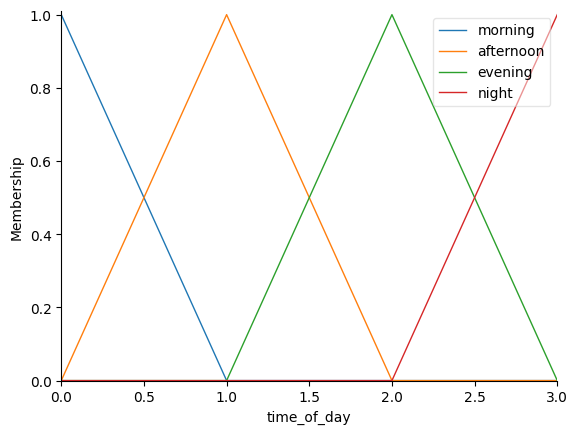

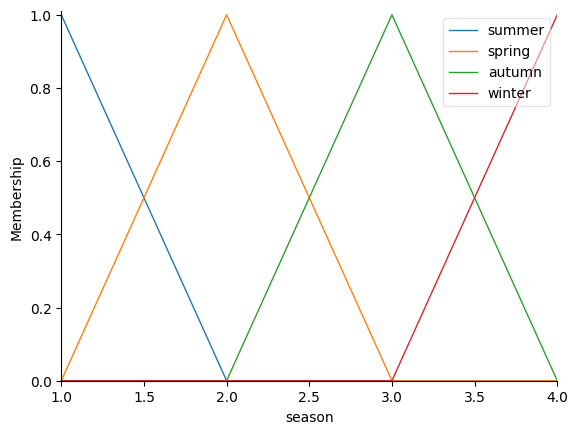

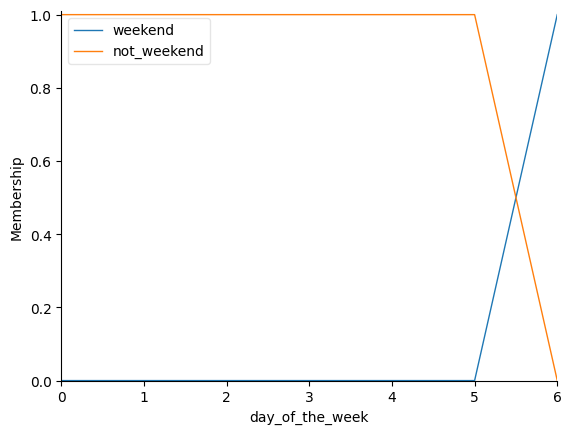

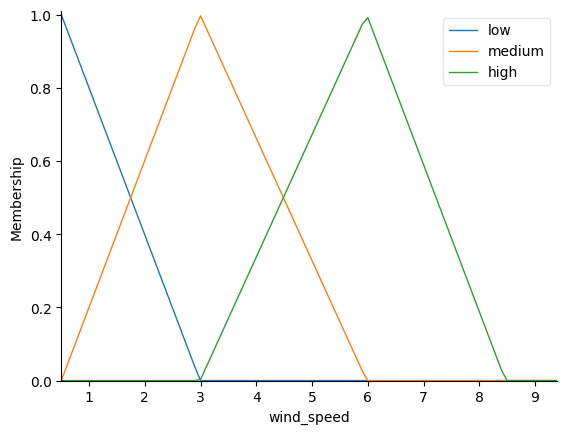

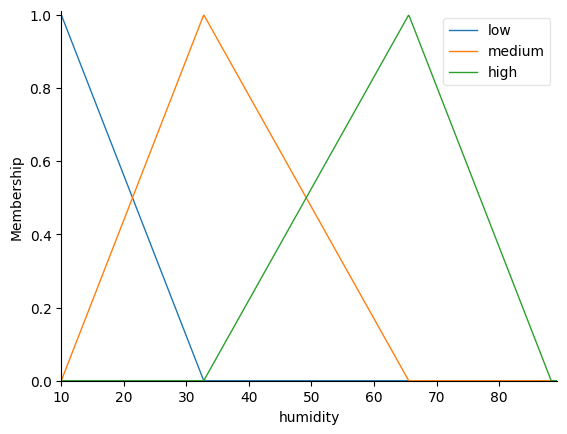

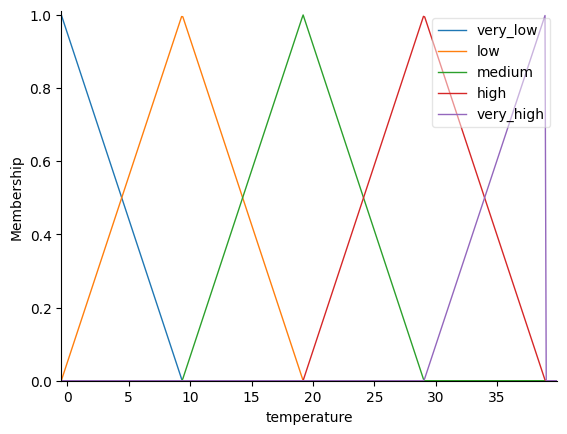

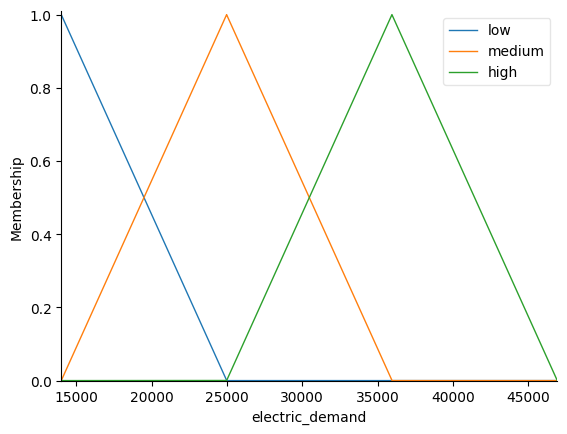

In [38]:
# After defining the membership functions, you can visualize them like this:
time_of_day.view()
season.view()
day_of_the_week.view()
wind_speed.view()
humidity.view()
temperature.view()
electric_demand.view()


Fuzzy Rules

In [39]:
rule1 = ctrl.Rule(time_of_day['night'] & season['winter'], electric_demand['high'])
rule2 = ctrl.Rule((time_of_day['morning'] | time_of_day['evening']) & day_of_the_week['not_weekend'], electric_demand['high'])
rule3 = ctrl.Rule(temperature['very_high'], electric_demand['high'])
rule4 = ctrl.Rule(humidity['high'] & temperature['very_high'], electric_demand['high'])
rule5 = ctrl.Rule(time_of_day['afternoon'] & (season['spring'] | season['autumn']), electric_demand['medium'])
rule6 = ctrl.Rule(temperature['very_low'] & humidity['low'], electric_demand['low'])
rule7 = ctrl.Rule(wind_speed['medium'] & temperature['medium'], electric_demand['medium'])
rule8 = ctrl.Rule(time_of_day['morning'] & wind_speed['high'], electric_demand['low'])
rule9 = ctrl.Rule(time_of_day['night'] & temperature['very_high'], electric_demand['high'])
rule10 = ctrl.Rule(time_of_day['afternoon'] & wind_speed['high'], electric_demand['low'])
rule11 = ctrl.Rule(time_of_day['afternoon'] & season['summer'], electric_demand['high'])
rule12 = ctrl.Rule((time_of_day['evening'] | time_of_day['night']) & season['winter'], electric_demand['high'])
rule13 = ctrl.Rule(time_of_day['afternoon'] & wind_speed['high'] & season['autumn'], electric_demand['low'])

Creating Control System for Fuzzy Logic Rules

In [40]:
# Create the control system
electric_demand_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9, rule10, rule11, rule12, rule13])

# Create the simulation
electric_demand_sim = ctrl.ControlSystemSimulation(electric_demand_ctrl)



In [41]:
from sklearn.metrics import mean_absolute_error

In [42]:
df_hourly

,Time,Season,Day_of_the_week,Wind_speed,Humidity,Temperature,Electric_demand,time_of_day
0,2019-01-01 00:00:00,1,1,2.84,55.81,1.68,21851.42,Night
1,2019-01-01 01:00:00,1,1,2.77,55.16,1.40,21099.67,Night
2,2019-01-01 02:00:00,1,1,2.69,54.53,1.19,20495.42,Night
3,2019-01-01 03:00:00,1,1,2.66,54.32,0.98,20147.50,Night
4,2019-01-01 04:00:00,1,1,2.63,54.30,0.81,20144.42,Night
...,...,...,...,...,...,...,...,...
26299,2021-12-31 19:00:00,4,4,1.72,64.79,7.09,26447.33,Evening
26300,2021-12-31 20:00:00,4,4,1.66,65.10,6.75,25743.08,Evening
26301,2021-12-31 21:00:00,4,4,1.66,65.32,6.40,25009.25,Evening
26302,2021-12-31 22:00:00,4,4,1.68,65.58,6.05,24060.25,Evening


In [43]:
# Create a list to store the results
fuzzy_results = []
# Take a sample of 2000 rows from your DataFrame
df_sample = df_hourly.sample(n=1000, random_state=1)
# Iterate over each row in your DataFrame
for index, row in df_sample.iterrows():
    try:
        # Set the inputs for the control system
        electric_demand_sim.input['time_of_day'] = list(df_hourly['time_of_day'].unique()).index(row['time_of_day'])
        electric_demand_sim.input['season'] = row['Season']
        electric_demand_sim.input['day_of_the_week'] = row['Day_of_the_week']
        electric_demand_sim.input['wind_speed'] = row['Wind_speed']
        electric_demand_sim.input['humidity'] = row['Humidity']
        electric_demand_sim.input['temperature'] = row['Temperature']
        # Compute the output
        electric_demand_sim.compute()
        # Append the result to the results DataFrame
        fuzzy_results.append({
            'index' :index,
            'electric_demand': electric_demand_sim.output['electric_demand']
        })
    except ValueError as e:
        print(f"Skipping row {index} due to error: {e}")

# Convert the results list to a DataFrame
fuzzy_results_df = pd.DataFrame(fuzzy_results)

# Now fuzzy_results_df contains the electric demand for each row in df_hourly
print(fuzzy_results_df)

# Calculate the MAE
mae = mean_absolute_error(df_hourly.loc[fuzzy_results_df['index'], 'Electric_demand'], fuzzy_results_df['electric_demand'])
print('Mean Absolute Error:', mae)


Skipping row 10894 due to error: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.
Skipping row 1174 due to error: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.
Skipping row 1703 due to error: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.
Skipping row 308 due to error: Crisp output cannot be calculated, likely because the system is too sparse. Check to make sure this set of input values will activate at least one connected Term in each Antecedent via the current set of Rules.
Skipping row 8355 due to err

In [47]:
df_hourly.head(18732)

,Time,Season,Day_of_the_week,Wind_speed,Humidity,Temperature,Electric_demand,time_of_day
0,2019-01-01 00:00:00,1,1,2.84,55.81,1.68,21851.42,Night
1,2019-01-01 01:00:00,1,1,2.77,55.16,1.40,21099.67,Night
2,2019-01-01 02:00:00,1,1,2.69,54.53,1.19,20495.42,Night
3,2019-01-01 03:00:00,1,1,2.66,54.32,0.98,20147.50,Night
4,2019-01-01 04:00:00,1,1,2.63,54.30,0.81,20144.42,Night
...,...,...,...,...,...,...,...,...
18727,2021-02-19 07:00:00,1,4,1.37,56.42,10.62,24300.67,Morning
18728,2021-02-19 08:00:00,1,4,1.65,52.68,12.38,23796.92,Morning
18729,2021-02-19 09:00:00,1,4,1.78,51.13,13.73,22986.75,Morning
18730,2021-02-19 10:00:00,1,4,2.02,49.46,14.69,22128.17,Morning


morning, afternoon, evening, night - 0,1,2,3
summer, spring, autumn, winter - 1,2,3,4
weekend, not_weekend - 1,0


In [49]:
# You can now simulate your system using specific input values
# For example:
electric_demand_sim.input['time_of_day'] = 0  # morning
electric_demand_sim.input['season'] = 1  # summer
electric_demand_sim.input['day_of_the_week'] = 0  # not_weekend
electric_demand_sim.input['wind_speed'] = 1.78  
electric_demand_sim.input['humidity'] = 51.13  
electric_demand_sim.input['temperature'] = 13.73  

# Compute the output
electric_demand_sim.compute()

# Actual Output -- 22986.75 KW

# Print the result
print(electric_demand_sim.output['electric_demand'])

31636.21425383331


MAE --> +- 9508.16